# Gaussian Mixture


## Reading dataset

In [1]:
from clustering.mnist import read_MNIST_small

data = read_MNIST_small().reduce_to_percentage(0.01)
data

Reading small MNIST
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\pixels_s.csv
Reading C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\datasets\labels_s.csv


[Length: 70; Features: 784]

In [2]:
X, y = data

## Construct iteration

In [3]:
from clustering.model.clustering import MixtureGaussianEvaluation

mg_evaluation = MixtureGaussianEvaluation(
    data=data,
    n_components=[2, 5, 10, 20, 30],
    hyperparameter=[5, 10, 15],
    log_=True
    #n_components=[2, 5, 10, 20, 30, 50, 100, 130, 170, 200],
    #hyperparameter=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
)
mg_evaluation

NormalizedCutEvaluation [n_components: [2, 5, 10, 20, 30], k: [5, 10, 15], not evaluated]

In [4]:
%%time
mg_evaluation.evaluate()

Processing k: 5
  > Processed number of component: 2 [0.01129 s] 
  > Processed number of component: 5 [0.00563 s] 
  > Processed number of component: 10 [0.00474 s] 
  > Processed number of component: 20 [0.00523 s] 
  > Processed number of component: 30 [0.00429 s] 
Processing k: 10
  > Processed number of component: 2 [0.00705 s] 
  > Processed number of component: 5 [0.01284 s] 
  > Processed number of component: 10 [0.00717 s] 
  > Processed number of component: 20 [0.00924 s] 
  > Processed number of component: 30 [0.00808 s] 
Processing k: 15
  > Processed number of component: 2 [0.01384 s] 
  > Processed number of component: 5 [0.01060 s] 
  > Processed number of component: 10 [0.00805 s] 
  > Processed number of component: 20 [0.00728 s] 
  > Processed number of component: 30 [0.00798 s] 
Wall time: 312 ms


In [6]:
mg_evaluation.best_model

MixtureGaussian[N-rows: 70; N-components: 10;  Score: 0.8840579710144928, N-clusters: 15] [K: 15] 

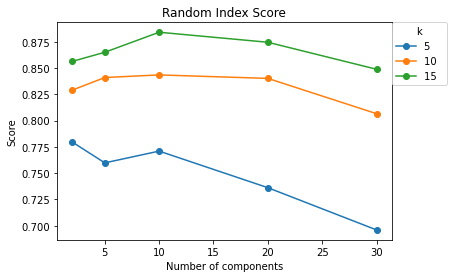

In [7]:
mg_evaluation.plot_score()

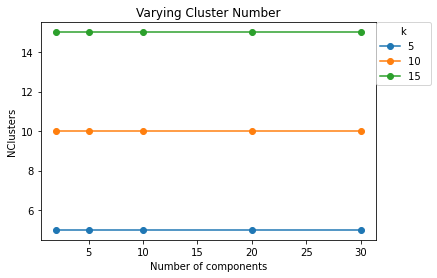

In [8]:
mg_evaluation.plot_n_clusters()

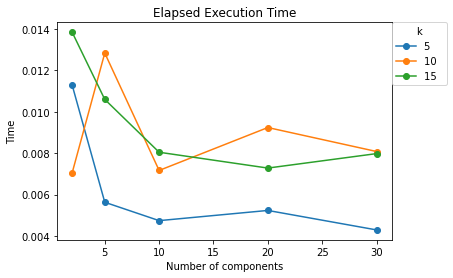

In [9]:
mg_evaluation.plot_time()

## Best model

In [10]:
best = mg_evaluation.best_model

In [11]:
best

MixtureGaussian[N-rows: 70; N-components: 10;  Score: 0.8840579710144928, N-clusters: 15] [K: 15] 

In [12]:
from clustering.model.model import DataClusterSplit

clusters = DataClusterSplit(data=data, index=best.out)

In [13]:
clusters

ClusterDataSplit [Data: 70, Clusters: 15, Mean-per-Cluster: 4.667, Score: 0.884] 

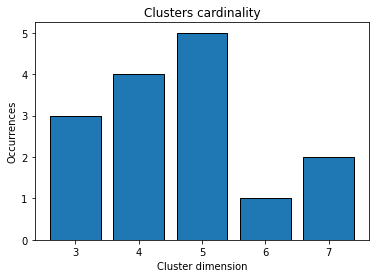

In [14]:
clusters.plot_frequencies_histo()

[Mode 5: {5: 2, 3: 2, 2: 1}] 


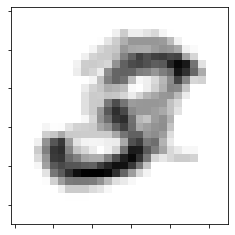

[Mode 9: {9: 3, 8: 1}] 


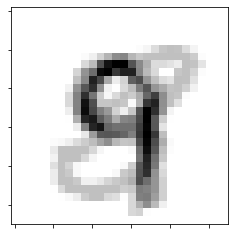

[Mode 9: {9: 4, 4: 1}] 


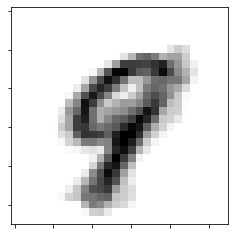

[Mode 6: {6: 5}] 


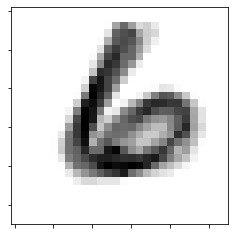

[Mode 3: {3: 2, 2: 1}] 


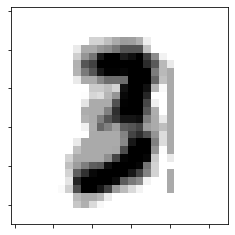

[Mode 1: {1: 3, 9: 1, 6: 1, 5: 1, 8: 1}] 


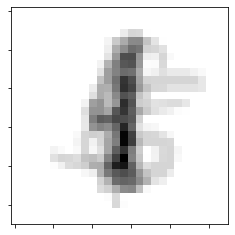

[Mode 7: {7: 1, 2: 1, 8: 1, 1: 1}] 


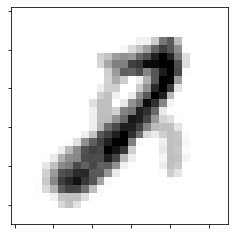

[Mode 5: {5: 2, 2: 1, 8: 1}] 


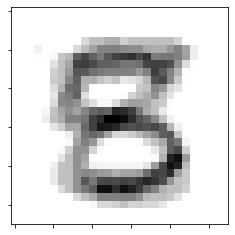

[Mode 9: {9: 2, 7: 2, 4: 2}] 


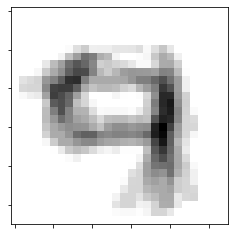

[Mode 0: {0: 3}] 


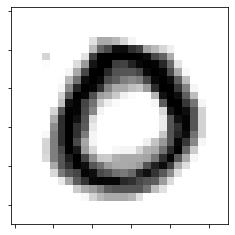

[Mode 8: {8: 3, 1: 2}] 


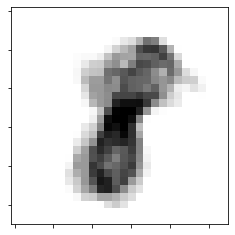

[Mode 2: {2: 5, 7: 1, 6: 1}] 


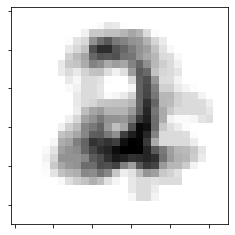

[Mode 7: {7: 3, 2: 1}] 


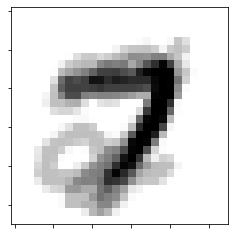

[Mode 8: {8: 2, 7: 1, 1: 1, 2: 1}] 


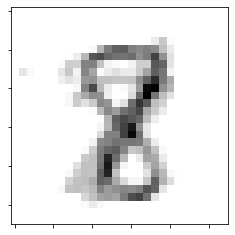

[Mode 0: {0: 2, 6: 1}] 


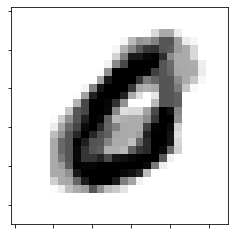

In [15]:
clusters.plot_mean_digit()